In [10]:
import pandas as pd
import os
from matplotlib import pyplot as plt 

In [148]:
# dir_path = os.path.dirname(os.path.realpath(__file__))
# record_export_folder = os.path.join(record_export_folder, 'recordings')
record_export_folder = 'recordings'
# file_path = os.path.join(record_export_folder, 'checkerboard.csv')
# file_path = os.path.join(record_export_folder, 'sultan_neutral_eye_closed.csv')
# file_path = os.path.join(record_export_folder, 'sultan_neutral_eye_open.csv')
# file_path = os.path.join(record_export_folder, 'sultan_vep_10seconds.csv')
# file_path = os.path.join(record_export_folder, 'sultan_neutral_eye_closed_3seconds.csv')
file_path = os.path.join(record_export_folder, 'sultan_vep_3seconds.csv')
# file_path = os.path.join(record_export_folder, 'sultan_vep_3seconds_2.csv')


In [149]:
df = pd.read_csv(file_path, skiprows=0, header=1)

In [150]:
keep_cols = ['Timestamp', 'EEG.Counter', 'EEG.P7', 'EEG.O1', 'EEG.O2', 'EEG.P8']

In [151]:
trimmed_df = df[keep_cols]

In [152]:
trimmed_df.head

<bound method NDFrame.head of         Timestamp  EEG.Counter       EEG.P7       EEG.O1       EEG.O2  \
0    1.601229e+09         34.0  4620.512695  3965.128174  3868.718018   
1    1.601229e+09         35.0  4616.922852  3951.794922  3864.615479   
2    1.601229e+09         36.0  4604.615234  3950.256348  3863.076904   
3    1.601229e+09         37.0  4604.102539  3961.538574  3865.128174   
4    1.601229e+09         38.0  4613.846191  3964.102539  3872.307617   
..            ...          ...          ...          ...          ...   
383  1.601229e+09         30.0  4628.205078  3969.743652  3882.564209   
384  1.601229e+09         31.0  4633.333496  3969.743652  3875.384521   
385  1.601229e+09         32.0  4621.538574  3957.948730  3866.666748   
386  1.601229e+09         33.0  4614.871582  3946.153809  3867.692383   
387  1.601229e+09         34.0  4620.512695  3951.794922  3871.794922   

          EEG.P8  
0    4313.333496  
1    4311.282227  
2    4304.615234  
3    4303.077148 

In [153]:
def plot_col_in_df(df, col):
    plt.title("{} Over Time".format(col)) 
    plt.xlabel("Millisecond") 
    plt.ylabel("Signal") 
    plt.plot(df[col].values) 
    plt.show()

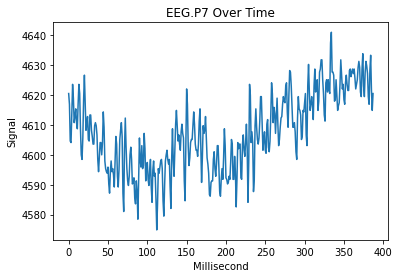

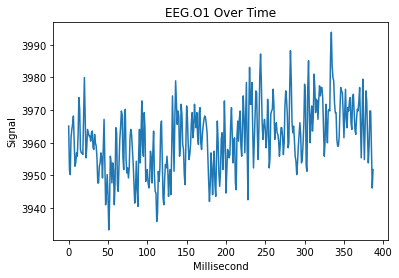

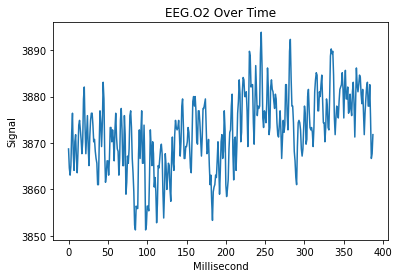

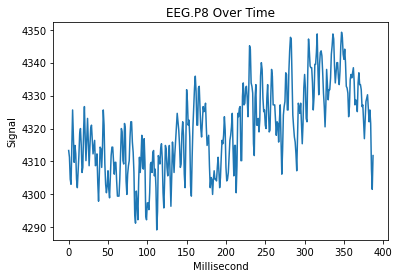

In [154]:
for col in trimmed_df.columns:
    if 'Timestamp' != col and 'EEG.Counter' != col:
        plot_col_in_df(trimmed_df, col)

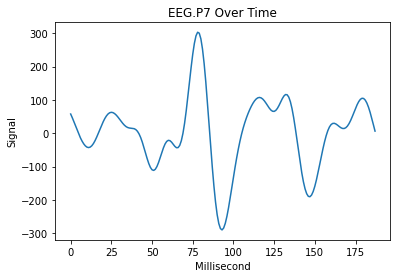

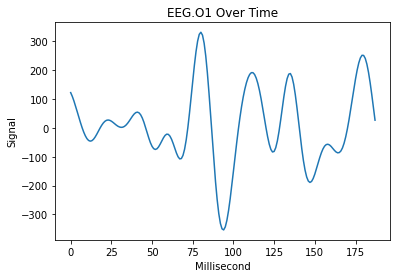

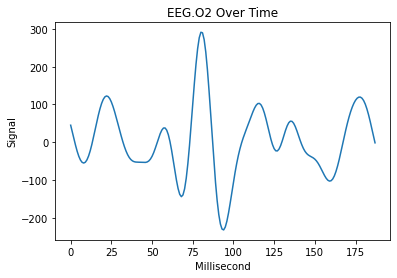

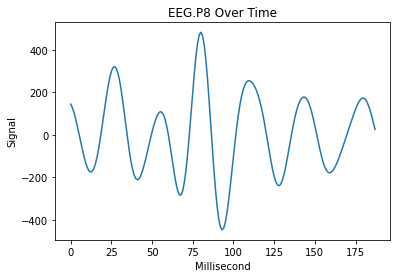

In [155]:
from scipy.signal import butter, lfilter, filtfilt
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz
from scipy import signal

def plot_col_in_df_filtered(df, col):
    fs = 512.0
    lowcut = 8.0
    highcut = 25.0
    
    plt.title("{} Over Time".format(col)) 
    plt.xlabel("Millisecond") 
    plt.ylabel("Signal") 
    
    vals = df[col].values
    filtered = butter_bandpass_filter(vals, lowcut, highcut, fs)
#     filtered = new_filter(vals)
    plt.plot(filtered[200:]) 
    plt.show()

def butter_bandpass(lowcut, highcut, fs, order=3):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=3):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    data = data * 50    # amplify data
#     y = lfilter(b, a, data)
    y = filtfilt(b, a, data)
    return y

def new_filter(data):
    filter = signal.firwin(400, [0.01, 0.06], pass_zero=False)
    return signal.convolve(data, filter, mode='same')

# Sample rate and desired cutoff frequencies (in Hz).

# Plot the frequency response for a few different orders.
for col in trimmed_df.columns:
    if 'Timestamp' != col and 'EEG.Counter' != col:
        plot_col_in_df_filtered(trimmed_df, col)